<a href="https://colab.research.google.com/github/naveya-g/Machine-Learning/blob/main/ML_Supervised_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


**Part-A**

**DOMAIN: Medical**

• **CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient's details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

• **DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

• **PROJECT OBJECTIVE:** To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

## **1. Data Understanding**

**A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data from all the 3 files and storing in seperate variables
data_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SL/Normal.csv')
data_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SL/Type_H.csv')
data_z = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SL/Type_S.csv')

**B. Print Shape and columns of all the 3 DataFrames.**

In [ ]:
#printing shape and columns of all the 3 dataframe
#dictionary to map the filenames to the dataframe
dataframe={"data_x":data_x, "data_y":data_y, "data_z":data_z}

#Iterating over the dictionary to print the shape and columns of each of the dataframe
for filename, df in dataframe.items():
    print(f"Filename: {filename}")
    print("shape:")
    print(df.shape)
    print("columns:")
    print(df.columns)
    print()


Filename: data_x
shape:
(100, 7)
columns:
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Filename: data_y
shape:
(60, 7)
columns:
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Filename: data_z
shape:
(150, 7)
columns:
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')



**C. Compare Column names of all the 3 DataFrames and clearly write observations.**

In [ ]:
data_x.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [ ]:
data_y.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [ ]:
data_z.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


**Observation:**


*   The number of columns is ***7*** in data_x, data_y, data_z.
*   The column names as indicated by all the 3 dataframes is same, such as: ***P_incidence, P_tilt, L_angle, S_slope, P_radius, S_Degree, Class.***
*  Same set of columns in all 3 dataframes suggests they might represent ***similar or related data.***
*   The first 6 columns in the 3 dataframe are numerical variable and the Class is of attribute value.








**D. Print DataTypes of all the 3 DataFrames.**

In [ ]:
#dictionary to map the filenames to the dataframe
dataframe={"data_x":data_x, "data_y":data_y, "data_z":data_z}

#Iterating over the dictionary to print datatype of each of the dataframe
for filename, df in dataframe.items():
    print(f"Filename: {filename}")
    print("datatype:")
    print(df.dtypes) #printing the datatype
    print()

Filename: data_x
datatype:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Filename: data_y
datatype:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Filename: data_z
datatype:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object



**E. Observe and share variation in 'Class' feature of all the 3 DataFrames.**

In [ ]:
#dictionary to map the filenames to the dataframe
dataframe={"data_x":data_x, "data_y":data_y, "data_z":data_z}

#Iterating over the dictionary to print unique values in class column of each of the dataframe
for filename, df in dataframe.items():
    print(f"Filename: {filename}")
    print("Unique values in the 'Class' column in each of the dataframe:")
    print(df['Class'].unique())
    print()

Filename: data_x
Unique values in the 'Class' column in each of the dataframe:
['Normal' 'Nrmal']

Filename: data_y
Unique values in the 'Class' column in each of the dataframe:
['Type_H' 'type_h']

Filename: data_z
Unique values in the 'Class' column in each of the dataframe:
['Type_S' 'tp_s']



**Observation:**


1. **dataframe data_x:**
     
*   unique values observed: ['Normal', 'Nrmal']
*   variation: The difference in unique values (Normal vs Nrmal) might indicate inconsistency in labelling or wrong data entry


2.   **dataframe data_y:**
     
*   unique values observed: ['Type_H' 'type_h']
*   variation: The difference in unique values (Type_H vs type_h) might indicate inconsistency in labelling or wrong data entry

3. **dataframe data_z:**
    
*   unique values observed: ['Type_S' 'tp_s']
*   variation: Comparative to the unique values in the previous dataframe, the (Type_S vs tp_s) in data_z class column also might indicate inconsistency in labelling or wrong data entry

In overall the class feature in all the 3dataframe has unique values of observation & variation, and these variations coming from data_x, data_y and data_z, will impact the data analysis and modeling.




## **2. Data Preparation and Exploration:**

**A. Unify all the variations in 'Class' feature for all the 3 DataFrames.**

In [ ]:
# use 'replace' to unify the variation in Class feature of each of the dataframe
data_x['Class']=data_x['Class'].replace('Nrmal','Normal')
data_y['Class']=data_y['Class'].replace('type_h', 'Type_H')
data_z['Class']=data_z['Class'].replace('tp_s', 'Type_S')

print(data_x['Class'].unique())
print(data_y['Class'].unique())
print(data_z['Class'].unique())



['Normal']
['Type_H']
['Type_S']


**B. Combine all the 3 DataFrames to form a single DataFrame**

In [ ]:
#combine all the 3dataframe using concat into single dataset
data_med=pd.concat([data_x,data_y,data_z]).reset_index(drop=True)
print(data_med)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    


*   On combining the 3dataframe into a single new dataframe the number of rows is 310 and 7 columns.
*   The 'reset_index(drop=True)' parameter indicates the new dataframe has new index without preserving the original index from the inidvidual dataframe.


**C. Print 5 random samples of this DataFrame**

In [ ]:
data_med.sample(5) # prints random 5samples from the dataframe

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
61,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
180,77.106571,30.469994,69.480628,46.636577,112.151600,70.759083,Type_S
31,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,Normal
64,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,Normal
257,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,Type_S


**D. Print Feature-wise percentage of Null values.**

To check for the feature-wise percentage of null values, firstly we have to check for the total number of nulls in each feature.

In [ ]:
data_med.isnull().values.sum()

0

In [ ]:
null_percentage=(data_med.isnull().sum()/len(data_med))*100
print(null_percentage)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


**E. Check 5-point summary of the new DataFrame.**

In [ ]:
#since class is of object type
data_med.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Observation from 5-point summary on each independent variable.

P_incidence:75percentage of values are less than 72.Tha maximum value observed is 129.83. Box plot is needed to check for outliers.Also mean and median is not having much difference.

P_tilt, L_angle,S_slope, P_radius: Even here the mean and median is not having much difference in value. IN these the distribution might be normal and can be visualized by pairplot.

P_tilt contains some negative values.

S_Degree: There is large difference between 75% and max value. Also the distribution is positively skewed because of the large difference in mean and median. Mean > Median

## **3. Data Analysis**

**A. Visualize a heatmap to understand correlation between all features**

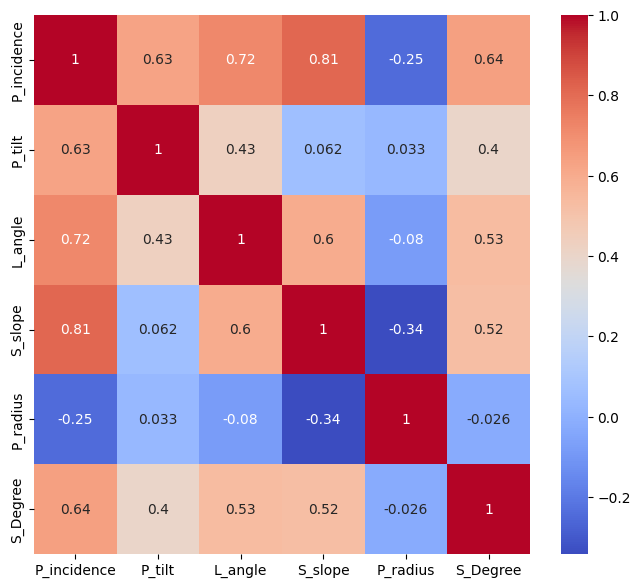

In [ ]:
data_med_heatmap=data_med.drop(columns=['Class'])
plt.figure(figsize=(8,7))
sns.heatmap(data_med_heatmap.corr(), annot=True, cmap='coolwarm')
plt.show()

**B. Share insights on correlation.**

   A. Features having stronger correlation with correlation value.
   
   B. Features having weaker correlation with correlation value.

The heatmap vizualization to understand the correlation between all numerical values has mix of correlation of data.


1.   Seemingly, **P_incidence** is having **good** enough correlation with P_tilt:0.63,L_angle:0.72, S_slope:0.81, S_Degree:0.64. Also, L_angle with S_slope:0.6

2.   **off all the correlation P_incidence is having the strongest correlation with S_slope with the value of:0.81**

3.   **P_radius** is having **less** correlation with othr variables such as P_incidence, L_angle, S_slope with negative correlation:-0.25,-0.08,-0.34






**C. Visualize a pairplot with 3 classes distinguished by colors and share insights.**

<Figure size 600x600 with 0 Axes>

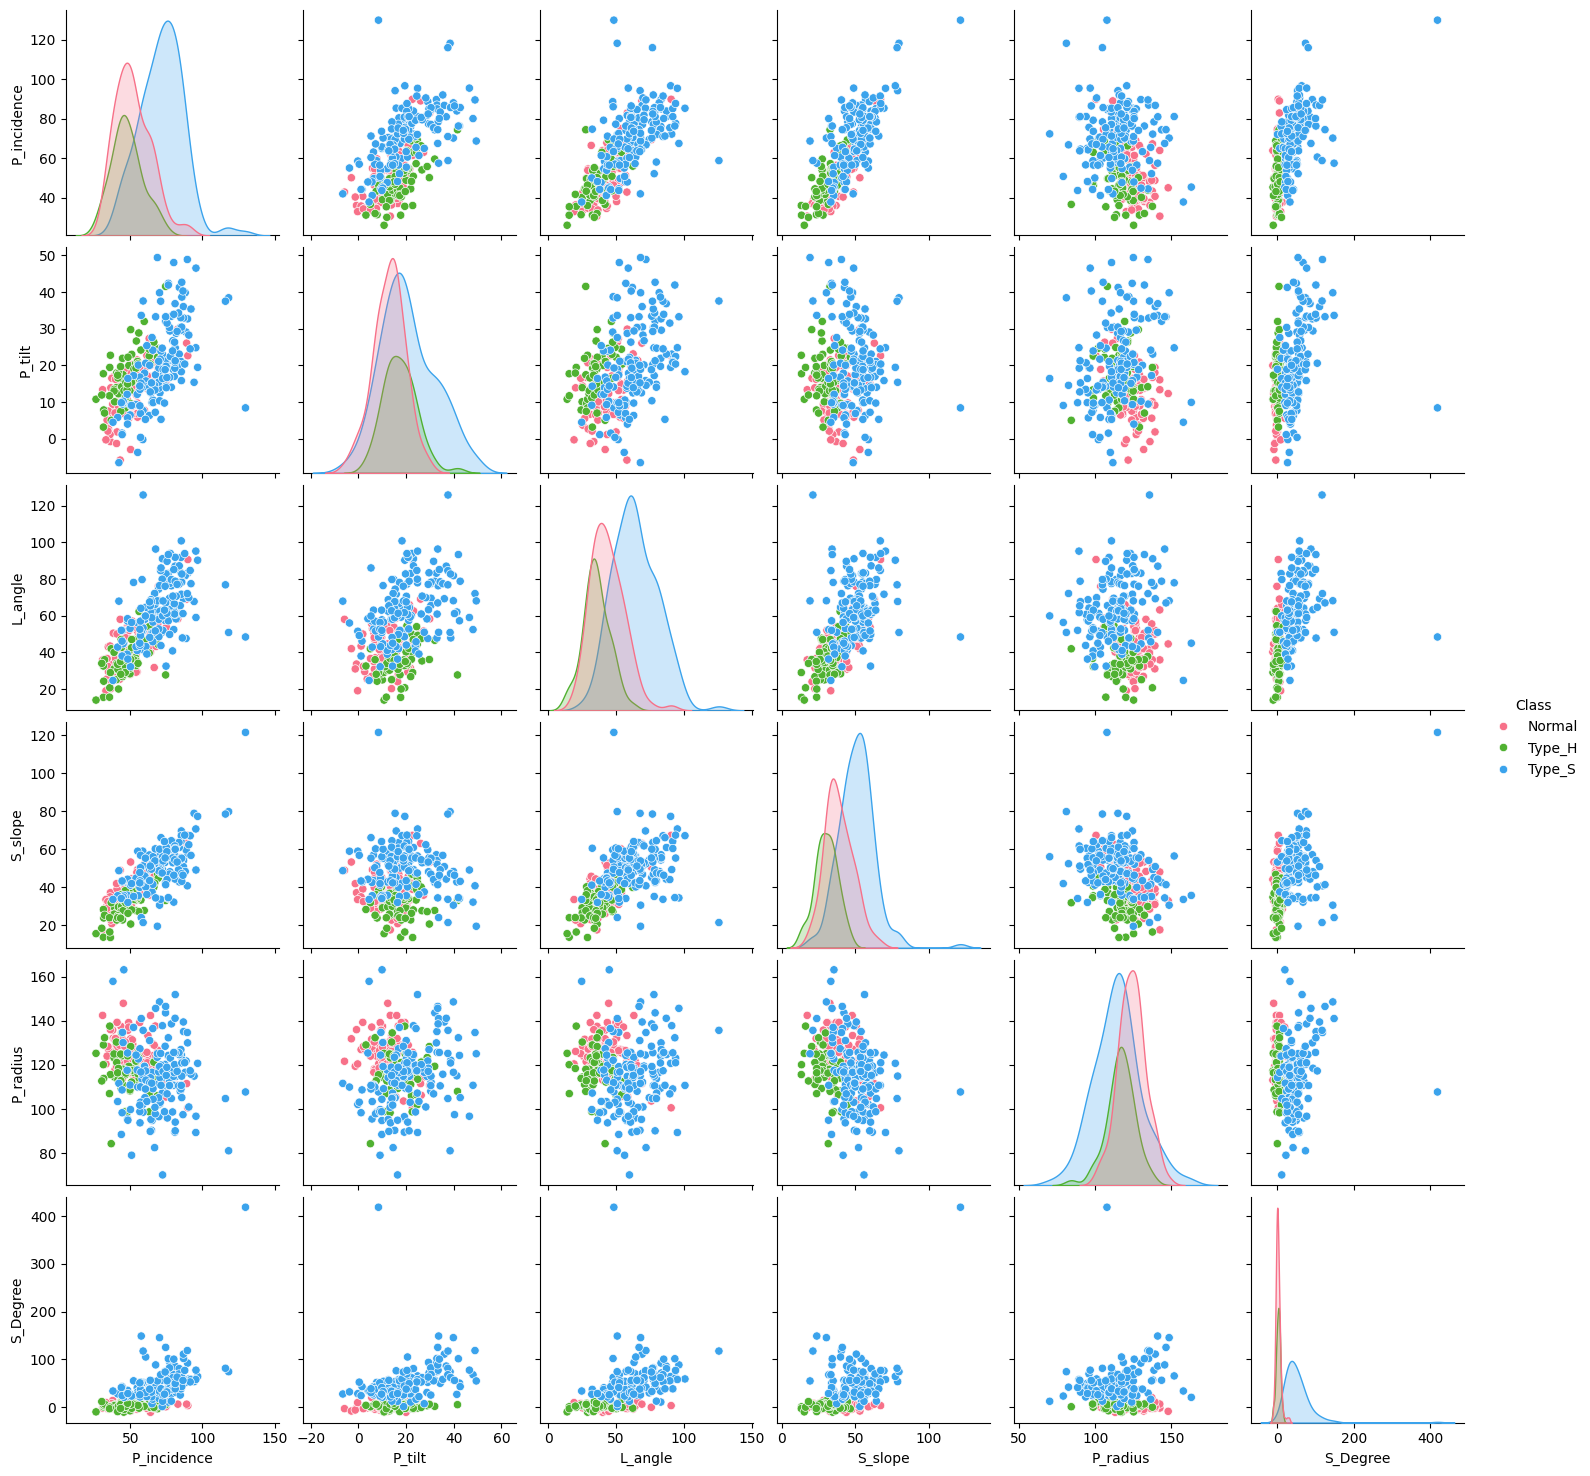

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data_med, diag_kind='kde', hue='Class', palette='husl')
plt.show()

observation from pairplot:

1.   From the pairplot using 3 classes: Normal, Type_H, Type_S, the Type_S
class is seen to have a more of aspread data when one is compared with the other variable.

2.  Also, the Class Normal is having an overall spread.

3.  Here, the S_degree is having a high influence on classification and the P_tilt is having the lesser influence.





**D. Visualize a jointplot for 'P_incidence' and 'S_slope' and share insights.**

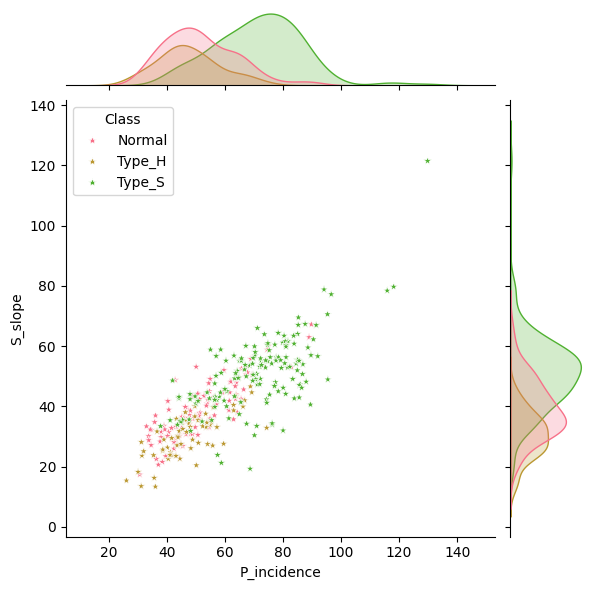

In [ ]:
sns.set_palette('husl')
sns.jointplot(data=data_med, x='P_incidence', y='S_slope', hue='Class', kind='scatter', marker='*')
plt.show()

Insights:


1.   The scatter plot shows the relationship between P_incidence and the S_slope. Ecach point on the graphs represents  combination of P_incidence and the S_slope values.

2.   On the basis from the above plot, the tewo seems to have positive correlation and the P_incidence when it increases the S_Slope increases. This indicates the good correlation between the two and is also similar to the one from the heatmap with highest correlation

3.  The marginal distribution alon x and y-axis shows distribution of P_incidence and S_Slope variables individually.






**E. Visualize a boxplot to check distribution of the features and share insights.**

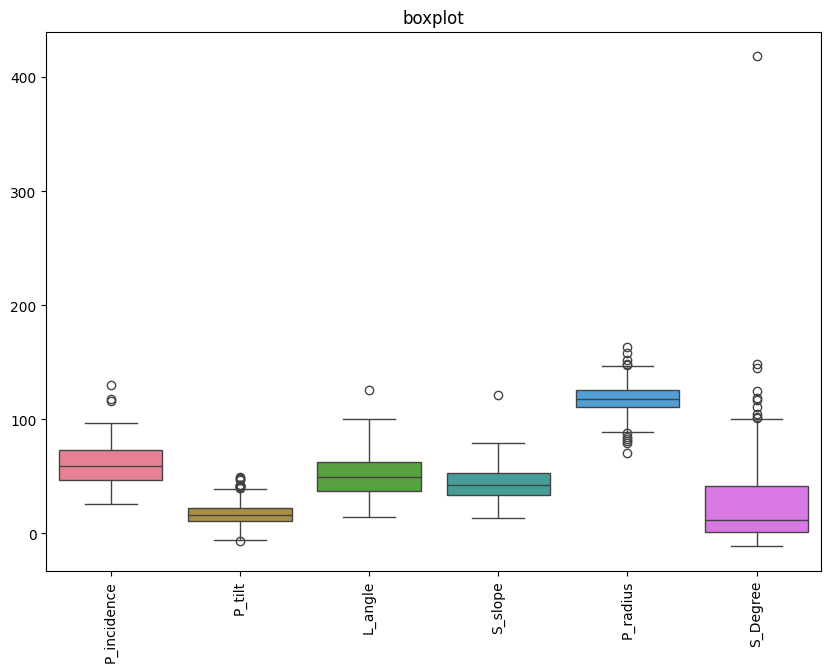

In [ ]:
columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']
plt.figure(figsize=(10,7))
sns.boxplot(data=data_med[columns])
plt.xticks(rotation=90)
plt.title('boxplot')
plt.show()

Insights: From the box plot we can see that the data distribution through their quartiles and that the meadian is centered for all the numerical variables except the S_Degree which is near the 1st Quartile. Also, we can predict that S_Degree is right skewed.

In [ ]:
data_med['Class']=data_med['Class'].astype('category')

## **4.Model Building**

In [ ]:
#segregate the feature and class variable
x_data=data_med[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']]
y_data=data_med['Class']

**A. Split data into X and Y.**

**B. Split data into train and test with 80:20 proportion.**

In [ ]:
from sklearn.model_selection import train_test_split

#split the data into training and testing dataset
#transform the data into feature and target
X=np.array(x_data)
y=np.array(y_data)

#train-test split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=60)

In [ ]:
X_train.shape

(248, 6)

In [ ]:
X_test.shape

(62, 6)

In [ ]:
# standardise the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the scaler
scaler = StandardScaler()  # You can also use MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_data.value_counts()

Class
Type_S    150
Normal    100
Type_H     60
Name: count, dtype: int64

KNN classifer model is based on distance algorithm, so it is required to scale the data.

**C. Train a Supervised Learning Classification base model using KNN classifier.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model.fit(X_train_scaled,y_train)
print('Train data Accuracy:{}'.format(model.score(X_train_scaled,y_train)))
pred1=model.predict(X_train_scaled)
pred=model.predict(X_test_scaled )
print('Test data Accuracy:{}'.format(model.score(X_test_scaled ,y_test)))

Train data Accuracy:0.842741935483871
Test data Accuracy:0.8387096774193549


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:{}'.format(accuracy_score(y_train, pred1)))
print(classification_report(y_train, pred1, labels=['Normal', 'Type_H', 'Type_S']))

accuracy score:0.842741935483871
              precision    recall  f1-score   support

      Normal       0.74      0.81      0.77        79
      Type_H       0.77      0.75      0.76        48
      Type_S       0.96      0.90      0.93       121

    accuracy                           0.84       248
   macro avg       0.82      0.82      0.82       248
weighted avg       0.85      0.84      0.84       248



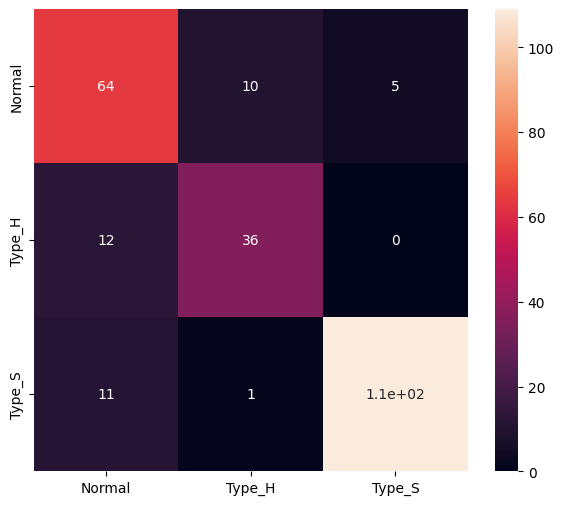

In [ ]:
cm1=confusion_matrix(y_train, pred1)

df_cm1=pd.DataFrame(cm1, index=[i for i in['Normal', 'Type_H', 'Type_S']],
                   columns=[i for i in['Normal', 'Type_H', 'Type_S']])
plt.figure(figsize=(7,6))
sns.heatmap(df_cm1, annot=True)
plt.show()

**D. Print all the possible performance metrics for both train and test data.**

Classification accuracy

logloss

Classification report

Area under ROC curve

confusion matrix



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('accuracy score:{}'.format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, labels=['Normal', 'Type_H', 'Type_S']))


accuracy score:0.8387096774193549
              precision    recall  f1-score   support

      Normal       0.81      0.81      0.81        21
      Type_H       0.73      0.67      0.70        12
      Type_S       0.90      0.93      0.92        29

    accuracy                           0.84        62
   macro avg       0.81      0.80      0.81        62
weighted avg       0.84      0.84      0.84        62



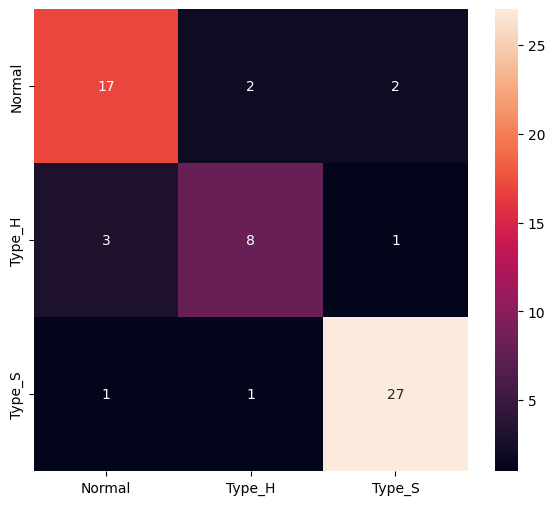

In [ ]:
cm=confusion_matrix(y_test, pred)

df_cm=pd.DataFrame(cm, index=[i for i in['Normal', 'Type_H', 'Type_S']],
                   columns=[i for i in['Normal', 'Type_H', 'Type_S']])
plt.figure(figsize=(7,6))
sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
scores=[]
for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled ,y_train)
    scores.append(model.score(X_test_scaled ,y_test))

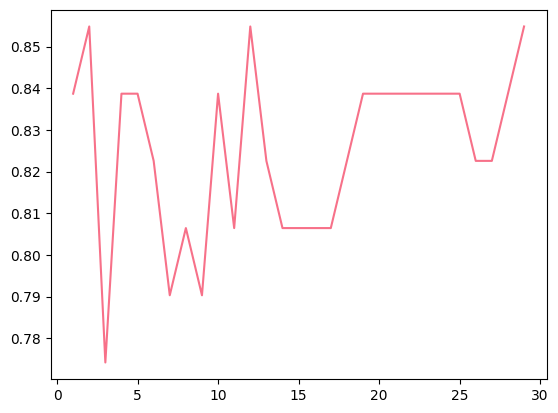

In [ ]:
plt.plot(range(1,30),scores)

**5. Performance Improvement**

**A. Experiment with various parameters to improve performance of the base model.**

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# based on
acc_score=[]
n_value=pd.DataFrame(columns=['K_value', 'acc_score','weight', 'p', 'MSE'])
k_val=[]
w=[]
p_val=[]
weights=['uniform','distance']
p=[1,2]

for k in range(1,30,2):
   for j in weights:
      for i in p:
          model=KNeighborsClassifier(n_neighbors=k, weights=j, p=i)
          model.fit(X_train_scaled,y_train)
          pred=model.predict(X_test_scaled )
          acc_score.append(accuracy_score(y_test,pred))
          k_val.append(k)
          w.append(j)
          p_val.append(i)
n_value['K_value']=k_val
n_value['acc_score']=acc_score
n_value['MSE']=1-n_value['acc_score']
n_value['p']=p_val
n_value['weight']=w

<Axes: xlabel='K_value', ylabel='acc_score'>

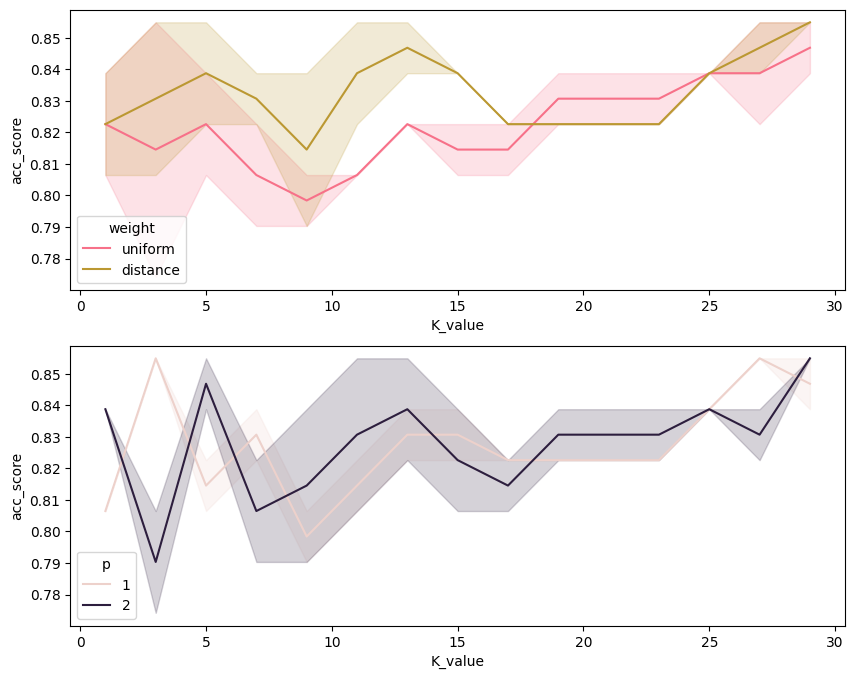

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
ax = ax.flatten()
sns.lineplot(data=n_value, x='K_value', y='acc_score', ax=ax[0], hue='weight')
sns.lineplot(data=n_value, x='K_value', y='acc_score', ax=ax[1], hue='p')


**B. Clearly showcase improvement in performance achieved.**

In [ ]:
k_value=n_value[n_value['acc_score']==n_value['acc_score'].max()]
k_value

,K_value,acc_score,weight,p,MSE
4,3,0.854839,uniform,1,0.145161
6,3,0.854839,distance,1,0.145161
11,5,0.854839,distance,2,0.145161
23,11,0.854839,distance,2,0.145161
27,13,0.854839,distance,2,0.145161
52,27,0.854839,uniform,1,0.145161
54,27,0.854839,distance,1,0.145161
57,29,0.854839,uniform,2,0.145161
58,29,0.854839,distance,1,0.145161
59,29,0.854839,distance,2,0.145161


Insights: We can see that K value with 5,9,11 and 13 has an accuracy score of 85.48 with weight=distance, and K value with 3 with weight in uniform has less accuracy score..All of it done with 20 neighbours. We can choose K=5 as best optimal KNN value as seen from previous score plot

**C. Clearly state which parameters contributed most to improve model performance.**

Train data Accuracy:0.875
Test data Accuracy:0.8548387096774194
Accuracy score: 0.8548387096774194
              precision    recall  f1-score   support

      Normal       0.85      0.81      0.83        21
      Type_H       0.69      0.75      0.72        12
      Type_S       0.93      0.93      0.93        29

    accuracy                           0.85        62
   macro avg       0.82      0.83      0.83        62
weighted avg       0.86      0.85      0.86        62



<Axes: >

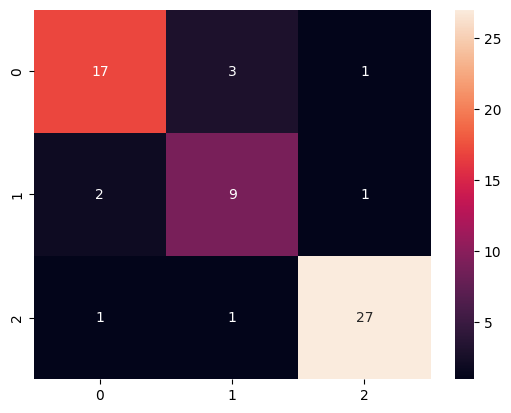

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3, metric='minkowski', weights='uniform', p=1)
model.fit(X_train_scaled,y_train)
print('Train data Accuracy:{}'.format(model.score(X_train_scaled,y_train)))
pred=model.predict(X_test_scaled )
print('Test data Accuracy:{}'.format(model.score(X_test_scaled,y_test)))
print("Accuracy score: {}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)




---





# **Part-B**

DOMAIN: Banking, Marketing

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

• DATA DICTIONARY:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

## **1. Data Understanding and Preparation**



**A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data from all the 2 files and storing in seperate variables
data_f1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SL/Data1.csv')
data_f2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SL/Data2.csv')


**B. Print shape and Column Names and DataTypes of both the Dataframes.**

In [ ]:
#printing shape and columns of all the 2 dataframe
#dictionary to map the filenames to the dataframe
dataframe={"data_f1":data_f1, "data_f2":data_f2}

#Iterating over the dictionary to print the shape and columns of each of the dataframe
for filename, df in dataframe.items():
    print(f"Filename: {filename}")
    print("shape:")
    print(df.shape)
    print("columns:")
    print(df.columns)
    print()

Filename: data_f1
shape:
(5000, 8)
columns:
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

Filename: data_f2
shape:
(5000, 7)
columns:
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')



**C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame**

In [ ]:
#merging the two seperate data on ID column
data_merged=pd.merge(data_f1, data_f2, on='ID')
data_merged

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [ ]:
#checking for shape and column for merged dataset
data_merged.shape


(5000, 14)

In [ ]:
data_merged.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

**D. Change Datatype of below features to ‘Object’**

In [ ]:
data_merged['CreditCard']=data_merged['CreditCard'].astype(object)
data_merged['FixedDepositAccount']=data_merged['FixedDepositAccount'].astype(object)
data_merged['InternetBanking']=data_merged['InternetBanking'].astype(object)
data_merged['Level']=data_merged['Level'].astype(object)
data_merged['Security']=data_merged['Security'].astype(object)
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(7), object(5)
memory usage: 547.0+ KB


**2. Data Exploration and Analysis**

**A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.**

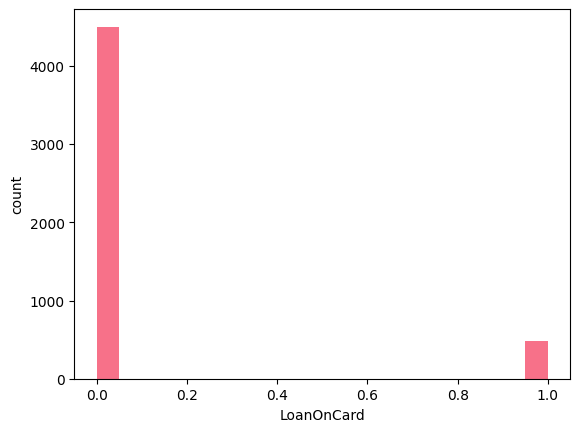

In [ ]:
plt.hist(data_merged['LoanOnCard'], bins=20)
plt.xlabel('LoanOnCard')
plt.ylabel('count')
plt.show()

**Insights: Its clearly seen that more than 4000 customers do not have active loan on card and while less than 1000 have an active lon on the card.**

**B. Check the percentage of missing values and impute if required.**

In [ ]:
data_merged.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [ ]:
null_percentage=(data_merged.isnull().sum()/len(data_merged))*100
print(null_percentage)



ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


**we can see that the active loan on card is 0.4% null values and so they can treated to not cause a problem in model building**

In [ ]:
data_merged=data_merged[data_merged['LoanOnCard'].notna()]
data_merged.isnull().sum().sum()

0

In [ ]:
data_merged

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


**C. Check for unexpected values in each categorical variable and impute with best suitable value.**

In [ ]:
data_merged['InternetBanking'].unique()

array([0, 1], dtype=object)

In [ ]:
data_merged['CreditCard'].unique()

array([0, 1], dtype=object)

In [ ]:
data_merged['Level'].unique()

array([3, 2, 1], dtype=object)

In [ ]:
data_merged['Security'].unique()

array([0, 1], dtype=object)

In [ ]:
data_merged['FixedDepositAccount'].unique()

array([0, 1], dtype=object)

In [ ]:
data_merged['LoanOnCard'].unique()

array([1., 0.])

In [ ]:
data_merged['LoanOnCard']=data_merged['LoanOnCard'].apply(int)

In [ ]:
 for i in ['Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']:
     data_merged[i]= data_merged[i].astype('category')

In [ ]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4980 entries, 9 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   HighestSpend         4980 non-null   int64   
 2   HiddenScore          4980 non-null   int64   
 3   MonthlyAverageSpend  4980 non-null   float64 
 4   Level                4980 non-null   category
 5   Mortgage             4980 non-null   int64   
 6   Security             4980 non-null   category
 7   FixedDepositAccount  4980 non-null   category
 8   InternetBanking      4980 non-null   category
 9   CreditCard           4980 non-null   category
 10  LoanOnCard           4980 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 392.4 KB


**3. Data Preparation and model building**

Before building the model dropping columns which has no useful insights.

In [ ]:
data_merged=data_merged.drop(labels=["ID","ZipCode","CustomerSince"], axis=1)
data_merged.head(10)

,Age,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,180,1,8.9,3,0,0,0,0,0,1
10,65,105,4,2.4,3,0,0,0,0,0,0
11,29,45,3,0.1,2,0,0,0,1,0,0
12,48,114,2,3.8,3,0,1,0,0,0,0
13,59,40,4,2.5,2,0,0,0,1,0,0
14,67,112,1,2.0,1,0,1,0,0,0,0
15,60,22,1,1.5,3,0,0,0,1,1,0
16,38,130,4,4.7,3,134,0,0,0,0,1
17,42,81,4,2.4,1,0,0,0,0,0,0
18,46,193,2,8.1,3,0,0,0,0,0,1


**B. Split data into train and test. Keep 25% data reserved for testing.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Define features (X) and target variable (y)
X = data_merged.drop(columns=['LoanOnCard'])  # Features
y = data_merged['LoanOnCard']  # Target variable

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Logistic Regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_logistic.predict(X_test)

# Print classification report for logistic regression without SMOTE
print("Classification Report for Logistic Regression without SMOTE:")
print(classification_report(y_test, y_pred))

# Apply SMOTE to the training data only
smote = SMOTE(ratio='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Impute missing values after SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_resampled_imputed = imputer.fit_transform(X_train_resampled)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train a new Logistic Regression model on the resampled and imputed data
model_logistic_resampled = LogisticRegression()
model_logistic_resampled.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set using the model trained on resampled and imputed data
y_pred_resampled = model_logistic_resampled.predict(X_test_scaled)

# Print classification report for logistic regression with SMOTE
print("Classification Report for Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_resampled))

# Additionally, print accuracy score
accuracy = accuracy_score(y_test, y_pred_resampled)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred_resampled)
print("f1:", f1)

Classification Report for Logistic Regression without SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1128
           1       0.72      0.57      0.64       117

    accuracy                           0.94      1245
   macro avg       0.84      0.77      0.80      1245
weighted avg       0.93      0.94      0.94      1245

Classification Report for Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1128
           1       0.40      0.90      0.55       117

    accuracy                           0.86      1245
   macro avg       0.69      0.88      0.74      1245
weighted avg       0.93      0.86      0.88      1245

Accuracy: 0.8634538152610441
f1: 0.5526315789473684


In [ ]:
from sklearn.svm import SVC

# Train Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_resampled_imputed, y_train_resampled)

# Make predictions on the test set using SVM model
y_pred_svm = svm_model.predict(X_test_imputed)

# Evaluate SVM model
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

# Train K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled_imputed, y_train_resampled)

# Make predictions on the test set using KNN model
y_pred_knn = knn_model.predict(X_test_imputed)

# Evaluate KNN model
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy for KNN:", accuracy_score(y_test, y_pred_knn))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1128
           1       0.33      0.90      0.48       117

    accuracy                           0.82      1245
   macro avg       0.66      0.85      0.68      1245
weighted avg       0.92      0.82      0.85      1245

Accuracy for SVM: 0.8152610441767069

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1128
           1       0.36      0.82      0.50       117

    accuracy                           0.85      1245
   macro avg       0.67      0.83      0.71      1245
weighted avg       0.92      0.85      0.87      1245

Accuracy for KNN: 0.8465863453815261
